# Etude d'un pendule simple

https://pythonmatplotlibtips.blogspot.com/2018/01/solve-animate-single-pendulum-odeint-artistanimation.html

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint
import IPython.display as IPdisplay

In [2]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

In [3]:
b = 0.25
c = 5.0
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 20, 301)

In [4]:
sol = odeint(pend, y0, t, args=(b, c))

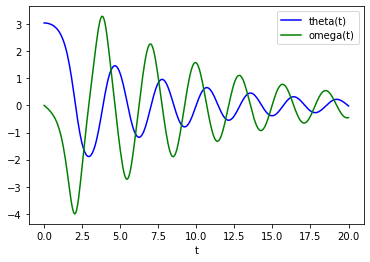

In [5]:
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.show()

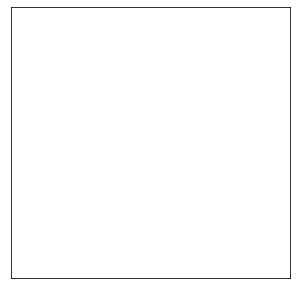

In [8]:
fig = plt.figure(figsize=(5, 5), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
plt.rcParams['font.size'] = 15

lns = []
for i in range(len(sol)):
    ln, = ax.plot([0, np.sin(sol[i, 0])], [0, -np.cos(sol[i, 0])],
                  color='k', lw=2)
    tm = ax.text(-1, 0.9, 'time = %.1fs' % t[i])
    lns.append([ln, tm])

ax.set_aspect('equal', 'datalim')
ani = animation.ArtistAnimation(fig, lns, interval=50)

In [9]:
ani.save('Single_pendulum.gif',writer='imagemagick',fps=1000/50)
IPdisplay.Image(url='Single_pendulum.gif')